
## Chantal Levi, Ezequiel Mautner

## TP2: Ajuste de datos



1. Formular el problema de cuadrados mínimos para el ajuste solicitado, escribiendo la matriz de diseño, el vector de parámetros, el vector de datos a ajustar, las ecuaciones normales, y las dimensiones de cada uno.
2. Hallar la solución al problema resolviendo las ecuaciones normales.
3. Calcular el error de aproximación dado por ∥ $y$ $−$ $X$ ˆ $a$ ∥.
4. Reportar los valores de los parámetros óptimos hallados redondeando a una cantidad de cifras significativas razonable.

## Ejercicio 1. Ajuste lineal.

a) Hallar la recta que mejor aproxima el conjunto de datos (1) en el sentido de cuadrados mínimos.

b) Graficar en una misma figura los datos (xi, yi) junto con la recta ajustada.

c) ¿Qué valor se obtendría si se usara la recta ajustada para intentar estimar el valor de la función
desconocida cuando x = 5?

1. Matriz de Diseño.
 
La matriz de diseño se representa como $X$ $\in$
${\mathbb{R}^{m\times 2}}$ :
$$X=
\begin{bmatrix}
    1 & x_{1}\\
    1 & x_{2}\\
    \vdots & \vdots\\
    1 & x_{m}\\
\end{bmatrix}
$$

Los x son los datos de la muestra y los m es el tamaño de la muestra

2. Vector de Parámetros.

El vector de parámetros se representa como $a$ $\in$:
${\mathbb{R}^2}$ :
$$a=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
\end{bmatrix}

$$
3. Vector de Datos a Ajustar.

El vector de datos a ajustar se representa como:
${\mathbb{R}^m}$ :
$$
y=
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{m}\\
\end{bmatrix}
$$
$y$ son los datos de la muestra y $m$ es el tamaño de la muestra

4. Ecuaciones Normales.
 
Las ecuaciones normales para el ajuste lineal son:
$$
X^T X a = X^T y
$$

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def Calcular_parametros_error(design, y):
    matrix_design = np.column_stack(design)

    matrix_designT = np.transpose(matrix_design)
    inverse = np.matmul(np.linalg.inv(np.matmul(matrix_designT,matrix_design)),matrix_designT)
    a = np.matmul(inverse,y)
    # Calcular el error de aproximación
    y_predicha = np.matmul(matrix_design,a)
    aproximation_error = np.sqrt(np.matmul(np.transpose(y - y_predicha),(y - y_predicha)))
    return (a,aproximation_error)
def plot(Title,x,y):
    plt.plot(x, y, marker='o', linestyle='', color='pink', label='Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(Title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

In [28]:
#vector parametros = a
#vector resultados = y
x, y = np.load("ejercicio_1.npy")
a, error = Calcular_parametros_error((np.ones_like(x),x),y)

b0 = a[0]
b1 = a[1]

# Imprimir el error de aproximación
print('3. El error de aproximación dado el código es : ~', round(error, 2))
print('4. Así obtenemos los parametros B0, B1 y los redondeamos a una cantidad de cifras significativas:  B0=', round(b0,2),'B1=', round(b1,2))
print( 'La recta que mejor aproxima el conjunto de datos es  Y =' ,round(b0,2) ,'+' , round(b1,2) ,'* x' )
print(b0, b1)

3. El error de aproximación dado el código es : ~ 1.57
4. Así obtenemos los parametros B0, B1 y los redondeamos a una cantidad de cifras significativas:  B0= 5.12 B1= 1.88
La recta que mejor aproxima el conjunto de datos es  Y = 5.12 + 1.88 * x
5.11692706038648 1.8826098792270431


C:\Users\chant\AppData\Local\Temp\ipykernel_66328\3635957091.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


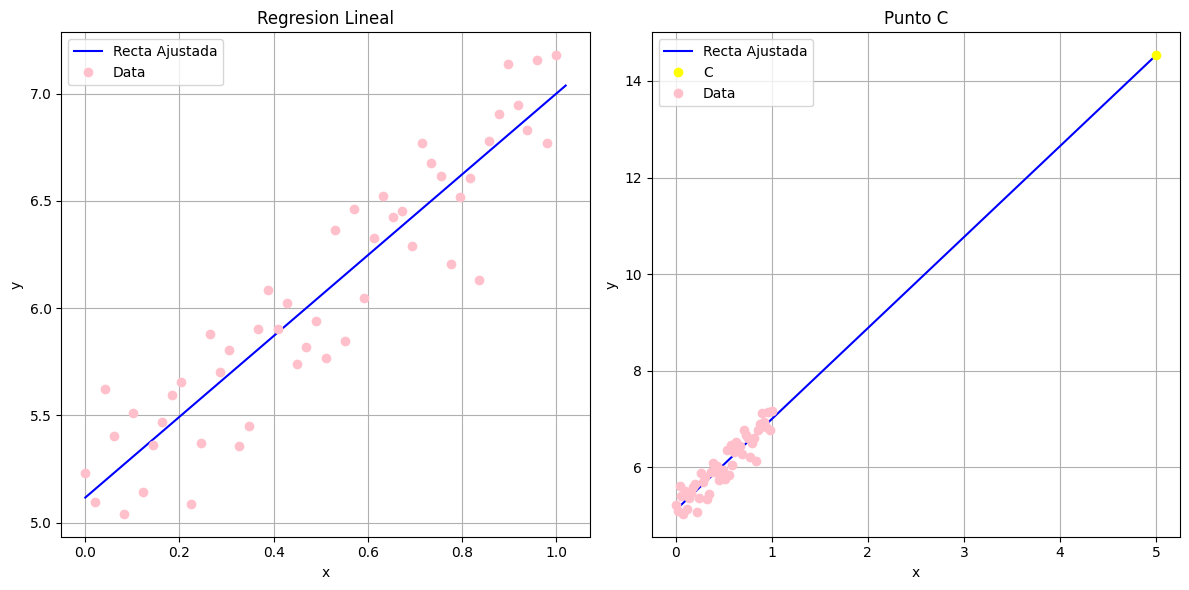

Dado x=5, si se usara la recta ajustada para intentar estimar la funcion desconocida obtendriamos:  y =  14.53


In [29]:
x, y = np.load("ejercicio_1.npy")
xs = np.linspace(0, 1.02, 100)
ys = b0 + b1*xs 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, ys, label='Recta Ajustada', color='blue')
plot('Regresion Lineal',x,y)


plt.subplot(1, 2, 2)
xs = np.linspace(0, 5, 100)
ys = b0 + b1*xs 
c = b0 + b1*5
plt.plot(xs, ys, label='Recta Ajustada', color='blue')
plt.plot(5, c, marker='o', label='C', color='yellow', linestyle='')
plot('Punto C',x,y)

plt.show()


print('Dado x=5, si se usara la recta ajustada para intentar estimar la funcion desconocida obtendriamos:  y = ', round(c,2))


 3. Después de evaluar el código, se determinó que el error de aproximación es $ \approx 1.57 $

4. Los parametros obtenidos fueron los siguientes: 
$$a=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
\end{bmatrix}
\approx
\begin{bmatrix}
    5.12\\
    1.88\\
\end{bmatrix}

$$
La ecuación de la recta que mejor se ajusta al conjunto de datos es $y $ $=$ $5.12$ $+$  $1.88$ $x$ 

Si consideramos $x$ $=$ $5$, al emplear la recta ajustada para estimar la función desconocida, obtendríamos $y$ $=$ $14.53$

## Ejercicio 2. Ajustes polinomiales.
a) Hallar la parábola que mejor aproxima el conjunto de datos (2) en el sentido de cuadrados mínimos.

b) Repetir con una función cúbica.

c) Graficar en una misma figura los datos junto con ambas curvas halladas.

d) ¿Cuál es mejor?

1. Matriz de Diseño.

La matriz de diseño se representa como $X_{1}$ $\in$ ${\mathbb{R}^{m\times 3}}$ y $X_{2}$ $\in$ ${\mathbb{R}^{m\times 4}}$:
$$X_{1}=
\begin{bmatrix}
    1 & x_{1} & x_{1}^2\\
    1 & x_{2} & x_{2}^2\\
    \vdots & \vdots & \vdots\\
    1 & x_{m} & x_{m}^2\\
\end{bmatrix}
, 
\quad
X_{2}=
\begin{bmatrix}
    1 & x_{1} & x_{1}^2 & x_{1}^3\\
    1 & x_{2} & x_{2}^2 & x_{2}^3\\
    \vdots & \vdots & \vdots & \vdots\\
    1 & x_{m} & x_{m}^2 & x_{m}^3\\
\end{bmatrix}

$$

x son los datos de la muestra y m es el tamaño de la muestra

2. Vector de Parámetros.

El vector de parámetros se representa como $a_{1}$ $\in$: ${\mathbb{R}^3}$ y $a_{2}$ $\in$: ${\mathbb{R}^4}$ :
$$a_{1}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
    a_{2}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
\end{bmatrix}

\quad

a_{2}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
    a_{2}\\
    a_{3}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_{3}\\
\end{bmatrix}

$$
Los $\beta_{i}$ y $a_{i}$ para cada $\vec{a}$ son distintos, comparten simbolo para simplificar la notacion

3. Vector de Datos a Ajustar.

El vector de datos a ajustar se representa como:
${\mathbb{R}^m}$ :
$$
y=
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{m}\\
\end{bmatrix}
$$
$y$ son los datos de la muestra y $m$ es el tamaño de la muestra

4. Ecuaciones Normales.

Las ecuaciones normales para el ajuste lineal son:
$$
X_{i}^T X_{i} a_{i} = X_{i}^T y 
\quad \quad i \in \text{{\{1,2\}}}
$$


3. Este es el error de aproximación dado el código para la cuadratica: ~ 4.0
3. Este es el error de aproximación dado el código para la cubica : ~ 1.57 

4. Así obtenemos los parametros B0, B1, B2 y los redondeamos a una cantidad de cifras significativas:  B0=-0.46 B1=-0.17 B2=0.09
La parabola que mejor aproxima el conjunto de datos es  Y = -0.46x^0 + -0.17x^1 + 0.09x^2

4. Así obtenemos los parametros B0, B1, B2, B3 y los redondeamos a una cantidad de cifras significativas:  B0=-25.95 B1=28.53 B2=-10.01 B3=1.12
La funcion que mejor aproxima el conjunto de datos es  Y = -25.95x^0 + 28.53x^1 + -10.01x^2 + 1.12x^3


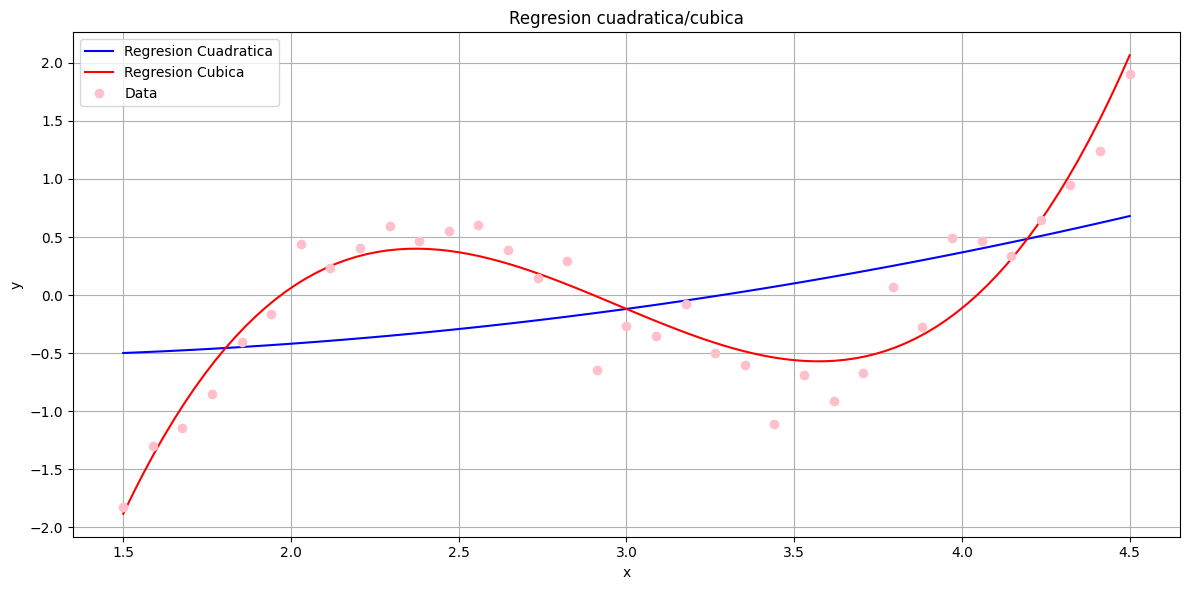

In [30]:
#vector parametros = a
import numpy as np
x, y = np.load("ejercicio_2.npy")

a1, error2 = Calcular_parametros_error((np.ones_like(x),x,x**2),y)
a2, error3 = Calcular_parametros_error((np.ones_like(x),x,x**2,x**3),y)

b0_2 = a1[0]
b1_2 = a1[1]
b2_2 = a1[2]

b0_3 = a2[0]
b1_3 = a2[1]
b2_3 = a2[2]
b3_3 = a2[3]

xs = np.linspace(1.5, 4.5, 100)
ys = b0_2 + b1_2*xs + b2_2*xs**2
yss = b0_3 + b1_3*xs + b2_3*xs**2 + b3_3*xs**3

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
plt.plot(xs, yss, label='Regresion Cubica', color='red')
plot('Regresion cuadratica/cubica',x,y)

rounded_list2 = np.round(a1,2)
rounded_list3 = np.round(a2,2)

print('3. Este es el error de aproximación dado el código para la cuadratica: ~', np.round(error2,2))
print('3. Este es el error de aproximación dado el código para la cubica : ~', np.round(error3,2),'\n')
string = ''
for bx in range(len(a1)):
    string = string +  ' B'+ str(bx)+ "="+  str(np.round(a1[bx],2))
print('4. Así obtenemos los parametros B0, B1, B2 y los redondeamos a una cantidad de cifras significativas:', string)
string = ''
for bx in range(len(a1)):
    if bx != len(a1)-1:
        string = string + str(np.round(a1[bx],2)) + 'x^' + str(bx) +' + '
    else:
         string = string + str(np.round(a1[bx],2)) + 'x^' + str(bx) +''
print( 'La parabola que mejor aproxima el conjunto de datos es  Y =', string)

string = ''
for bx in range(len(a2)):
    string = string +  ' B'+ str(bx)+ "="+  str(np.round(a2[bx],2))
print('\n4. Así obtenemos los parametros B0, B1, B2, B3 y los redondeamos a una cantidad de cifras significativas:', string)
string = ''
for bx in range(len(a2)):
    if bx != len(a2)-1:
        string = string + str(np.round(a2[bx],2)) + 'x^' + str(bx) +' + '
    else:
         string = string + str(np.round(a2[bx],2)) + 'x^' + str(bx) +''
print( 'La funcion que mejor aproxima el conjunto de datos es  Y =', string)

3. Después de evaluar el código de la cuadratica, se determinó que el error de aproximación es de $ \approx 4.00. $
4. Obtuvimos los parametros siguientes: 
 
$$a_{1}=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
\end{bmatrix}

\approx
\begin{bmatrix}
    -0.46\\
    -0.17\\
    0.09\\
\end{bmatrix}
$$

Por lo tanto, la ecuación de la recta que mejor se ajusta al conjunto de datos es $y$ $=$ $-$ $0.46x^0$ $-$ $0.17x^1$ $+ 0.09x^2$

3. Luego, después de evaluar el código de la cubica, se determinó que el error de aproximación es $ \approx  1.57. $
4. Obtuvimos los parametros siguientes:

$$a_{2}=

\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_{3}\\
\end{bmatrix}
\approx
\begin{bmatrix}
    -25.95\\
    28.53\\
    -10.01\\
    1.12\\

\end{bmatrix}

$$
 Por lo tanto, la ecuación de la recta que mejor se ajusta al conjunto de datos es $y$ $=$ $-$ $25.95x^0$ $+$ $28.53x^1$ $- 10.01x^2$ $+$ $1.12x^3$

## Ejercicio 3. Ajustes no polinomiales.

El objetivo en esta sección es explorar otras formas funcionales no polinomiales. (Ver por ejemplo
Series de Fourier). Tener en cuenta el trade-off entre cantidad de parámetros involucrados y el error de
aproximación, es decir, estimar la mínima cantidad de parámetros que resulten en un ajuste razonable.

a) Para los conjuntos de datos (3.i) y (3.ii) por separado, proponer una forma funcional adecuada
y hallar la curva de la forma propuesta que mejor aproxima los datos en el sentido de cuadrados
mínimos.

b) Graficar en dos figuras distintas los conjuntos de datos y las curvas ajustadas en cada caso

1. Matriz de Diseño.

La matriz de diseño se representa como $X_{1}$ $\in$ ${\mathbb{R}^{m\times 2}}$, $X_{2}$ $\in$ ${\mathbb{R}^{m\times 3}}$ y $X_{3}$ $\in$ ${\mathbb{R}^{m\times 4}}$:
$$X_{1}=
\begin{bmatrix}
    x_{1} & cos(x_{1})\\
    x_{2} & cos(x_{2})\\
    \vdots & \vdots\\
    x_{m} & cos(x_{m})\\
\end{bmatrix}, 
\quad
X_{2}=
\begin{bmatrix}
    x_{1} & cos(x_{1}) & cos(x_{1})^2\\
    x_{2} & cos(x_{2}) & cos(x_{2})^2\\
    \vdots & \vdots & \vdots\\
    x_{m} & cos(x_{m}) & cos(x_{m})^2\\
\end{bmatrix}
, 
\quad
X_{3}=
\begin{bmatrix}
    x_{1} & cos(x_{1}) & cos(x_{1})^2 & cos(x_{1})^3\\
    x_{2} & cos(x_{2}) & cos(x_{2})^2 & cos(x_{2})^3\\
    \vdots & \vdots & \vdots & \vdots\\
    x_{m} & cos(x_{m}) & cos(x_{m})^2 & cos(x_{m})^3\\
\end{bmatrix}
$$
x son los datos de la muestra y m es el tamaño de la muestra

2. Vector de Parámetros.

El vector de parámetros se representa como $a_{1}$ $\in$: ${\mathbb{R}^2}$, $a_{2}$ $\in$: ${\mathbb{R}^3}$ y $a_{3}$ $\in$: ${\mathbb{R}^4}$ :
$$
a_{1}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
\end{bmatrix},
\quad
a_{2}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
    a_{2}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
\end{bmatrix}
,
\quad

a_{3}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
    a_{2}\\
    a_{3}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_{3}\\
\end{bmatrix}

$$
Los $\beta_{i}$ y $a_{i}$ para cada $\vec{a}$ son distintos, comparten simbolo para simplificar la notacion

3. Vector de Datos a Ajustar.

El vector de datos a ajustar se representa como:
${\mathbb{R}^m}$ :
$$
y=
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{m}\\
\end{bmatrix}
$$
$y$ son los datos de la muestra y $m$ es el tamaño de la muestra

4. Ecuaciones Normales.

Las ecuaciones normales para el ajuste lineal son:
$$
X_{i}^T X_{i} a_{i} = X_{i}^T y 
\quad \quad i \in \text{{\{1,2,3\}}}
$$

3. El error de aproximación dado el código para el conjunto 3i es : ~ 2.33 para X1, ~ 1.47 para X2, ~ 1.42 para X3
4. Así obtenemos una funcion adecuada (cos^3) para el conjunto 3i : Y = 0.02cos^0 + 0.21cos^1 + 0.42cos^2 + 0.28cos^3


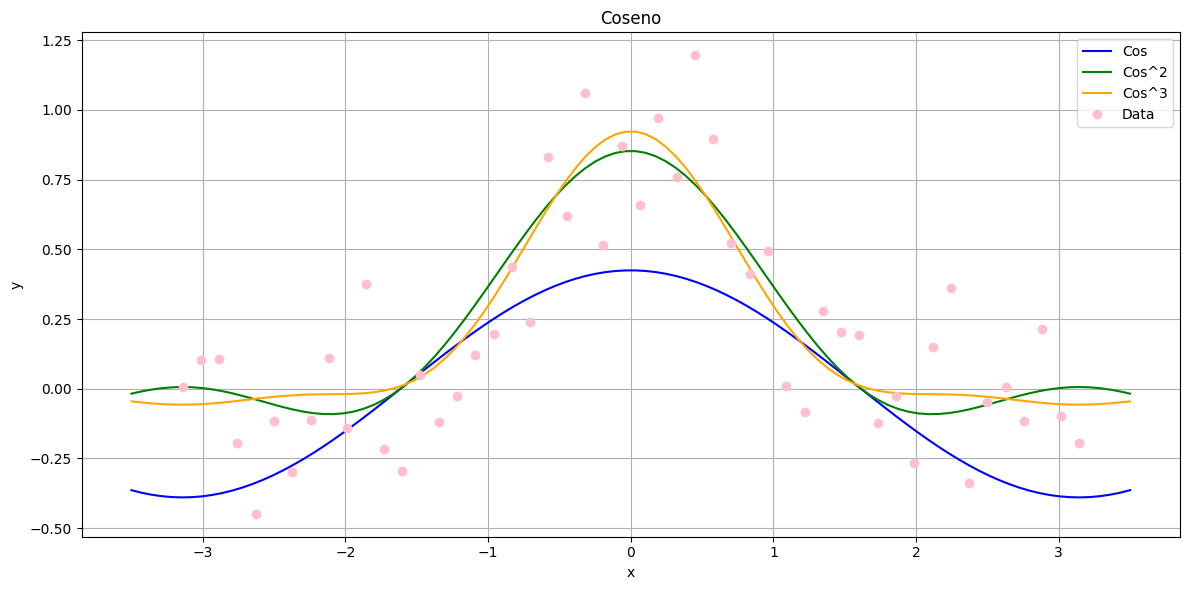

In [41]:
#vector parametros = a
x, y = np.load("ejercicio_3_i.npy")

a1, error1 = Calcular_parametros_error((x,np.cos(x)),y)
a2, error2 = Calcular_parametros_error((x,np.cos(x),np.cos(x)**2),y)
a3, error3 = Calcular_parametros_error((x,np.cos(x),np.cos(x)**2,np.cos(x)**3),y)

print('3. El error de aproximación dado el código para el conjunto 3i es : ~', np.round(error1,2),'para X1, ~', np.round(error2,2),'para X2, ~', np.round(error3,2),'para X3')
string = ''
for bx in range(len(a3)):
    if bx != len(a3)-1:
        string = string + str(np.round(a3[bx],2)) + 'cos^' + str(bx) +' + '
    else:
         string = string + str(np.round(a3[bx],2)) + 'cos^' + str(bx) +''
print('4. Así obtenemos una funcion adecuada (cos^3) para el conjunto 3i : Y =', string)

xs = np.linspace(-3.5, 3.5, 100)
y1 = a1[0] + a1[1]*np.cos(xs)
y2 = a2[0] + a2[1]*np.cos(xs)+ a2[2]*(np.cos(xs)**2) 
y3 = a3[0] + a3[1]*np.cos(xs)+ a3[2]*(np.cos(xs)**2) + a3[3]*(np.cos(xs)**3)

plt.figure(figsize=(12, 6))
plt.plot(xs, y1, label='Cos', color='blue')
plt.plot(xs, y2, label='Cos^2', color='green')
plt.plot(xs, y3, label='Cos^3', color='orange')
plot('Coseno',x,y)
plt.show()


matrix = [x,np.cos(x)]
errores = []
for power in range(2,15):
    matrix.append(np.cos(x)**power)
    parametros, e = (Calcular_parametros_error(matrix,y))
    errores.append((power, e))
##print('Potencia y error de cos', errores)


Para simplificar el notacion llamamos a las funciones que nacen de las matrices de diseño:$\newline$
$X_{1} = cos \newline$
$X_{2} = cos^2\newline$
$X_{3} = cos^3\newline$

3. Después de evaluar el código para el conjunto $3i$, se obtuvieron errores de aproximación de $ \approx $ $2.33$  para $cos$, $ \approx $ $ 1.47$ para $cos^2$ y $ \approx $ $1.42$ para $cos^3$.
4. A partir de estos resultados, se identificó que la función que mejor se ajusta al conjunto $3i$ es $cos^3$ cuyos parametros son:
$$a_{3}=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_{3}\\
\end{bmatrix} 
\approx
\begin{bmatrix}
    0.02\\
    0.21\\
    0.42\\
   0.28\\
\end{bmatrix} 
$$
Tras analizar el error de los primeros 15 términos de la serie coseno, hemos concluido que la mejor opción en términos de trade-off sería emplear la función $cos^3$. Además, hemos tomado la decisión de emplear la función $cos^3$ en lugar de $cos^2$, ya que consideramos que proporciona un ajuste visualmente más adecuado en los extremos.$\newline$
Por lo tanto, la ecuación de la función que mejor se ajusta al conjunto de datos es $y$ $=$ $0.02$ $cos^0$ $+$ $0.21$ $cos^1$ $+$ $0.42$ $cos^2$ $+$ $0.28 $ $cos^3$ Esta función proporciona una adecuada aproximación para el conjunto de datos $3i$, minimizando los errores de aproximación mencionados.


1. Matriz de Diseño.

La matrices de diseño se representan como $X_{1}$ $\in$ ${\mathbb{R}^{m\times 3}}$, $X_{2}$ $\in$ ${\mathbb{R}^{m\times 4}}$ y $X_{3}$ $\in$ ${\mathbb{R}^{m\times 4}}$:
$$X_{1}=
\begin{bmatrix}
    x_{1} & cos(2x_{1}) & sin(x_{1}^2)\\
    x_{2} & cos(2x_{2}) & sin(x_{2}^2)\\
    \vdots & \vdots & \vdots\\
    x_{m} & cos(2x_{m}) & sin(x_{m}^2)\\
\end{bmatrix}, 
\quad
X_{2}=
\begin{bmatrix}
    x_{1} & cos(2x_{1}) & sin(x_{1}^2) & cos(x_{1})\\
    x_{2} & cos(2x_{2}) & sin(x_{2}^2) & cos(x_{2})\\
    \vdots & \vdots & \vdots & \vdots\\
    x_{m} & cos(2x_{m}) & sin(x_{m}^2) & cos(x_{m})\\
\end{bmatrix}
, 
\quad
X_{3}=
\begin{bmatrix}
    x_{1} & cos(2x_{1}) & sin(x_{1}^2) & cos(x_{1})^2\\
    x_{2} & cos(2x_{2}) & sin(x_{2}^2) & cos(x_{2})^2\\
    \vdots & \vdots & \vdots & \vdots\\
    x_{m} & cos(2x_{m}) & sin(x_{m}^2) & cos(x_{m})^2\\
\end{bmatrix}
$$
x son los datos de la muestra y m es el tamaño de la muestra

2. Vector de Parámetros.

Los vectores de parámetros se representan como $a_{1}$ $\in$: ${\mathbb{R}^3}$, $a_{2}$ $\in$: ${\mathbb{R}^4}$ y $a_{3}$ $\in$: ${\mathbb{R}^5}$ :
$$
a_{1}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
    a_{2}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
\end{bmatrix},
\quad
a_{2}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
    a_{2}\\
    a_{3}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_{3}\\
\end{bmatrix}
,
\quad

a_{3}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
    a_{2}\\
    a_{3}\\
    a_{4}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_{3}\\
    \beta_{4}\\
\end{bmatrix}

$$
Los $\beta_{i}$ y $a_{i}$ para cada $\vec{a}$ son distintos, comparten simbolo para simplificar la notacion

3. Vector de Datos a Ajustar.

El vector de datos a ajustar se representa como:
${\mathbb{R}^m}$ :
$$
y=
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{m}\\
\end{bmatrix}
$$
$y$ son los datos de la muestra y $m$ es el tamaño de la muestra

4. Ecuaciones Normales.

Las ecuaciones normales para el ajuste lineal son:
$$
X_{i}^T X_{i} a_{i} = X_{i}^T y 
\quad \quad i \in \text{{\{1,2,3\}}}
$$

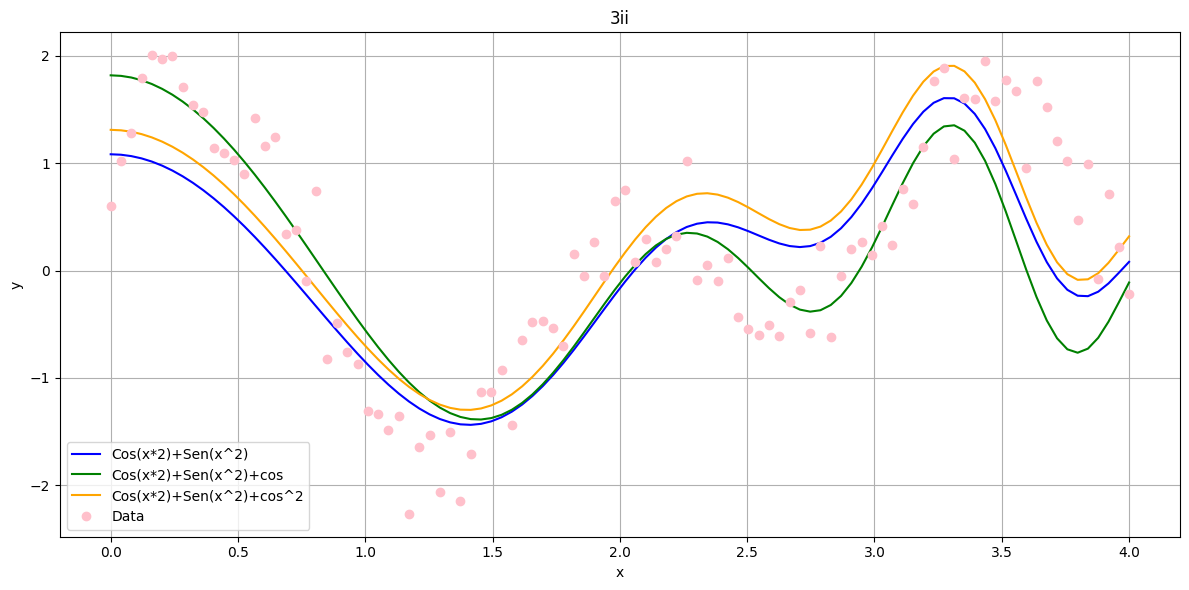

Los errores de las 3 funciones de aproximacion propuestas son respectivamente : ~ 6.53 para y1, ~ 5.78 para y2, ~ 6.32 para y3
Las funciones propuestas para aproximar los datos del conjunto 3ii son:
y1 =  0.06 + 1.02 cos(x*2) + -0.58 sin(x^2)
y2 =  0.2 + 1.02 cos(x*2) + -0.78 sin(x^2)) + 0.6 cos(x)
y3 =  -0.06 + 0.69 cos(x*2) + -0.66 sin(x^2)) + 0.69 cos(x^2)


In [46]:
#vector parametros = a
x, y = np.load("ejercicio_3_ii.npy")

a1, error1 = Calcular_parametros_error((x,np.cos(x*2),np.sin(x**2)),y)
a2, error2 = Calcular_parametros_error((x,np.cos(x*2),np.sin(x**2), np.cos(x)),y)
a3, error3 = Calcular_parametros_error((x,np.cos(x*2),np.sin(x**2), np.cos(x)**2),y)

xs = np.linspace(0, 4, 100)
y1 = a1[0] + a1[1]*(np.cos(xs*2))+a1[2]*(np.sin(xs**2))
y2 = a2[0] + a2[1]*(np.cos(xs*2))+a2[2]*(np.sin(xs**2)) + a2[3]*(np.cos(xs))
y3 = a3[0] + a3[1]*(np.cos(xs*2))+a3[2]*(np.sin(xs**2)) + a3[3]*(np.cos(xs)**2)

plt.figure(figsize=(12, 6))
plt.plot(xs, y1, label='Cos(x*2)+Sen(x^2)', color='blue')
plt.plot(xs, y2, label='Cos(x*2)+Sen(x^2)+cos', color='green')
plt.plot(xs, y3, label='Cos(x*2)+Sen(x^2)+cos^2', color='orange')
plot('3ii',x,y)
plt.show()

print('Los errores de las 3 funciones de aproximacion propuestas son respectivamente : ~', np.round(error1,2),'para y1, ~', np.round(error2,2),'para y2, ~', np.round(error3,2),'para y3')
string = ''

a1 = [np.round(num,2) for num in a1]
a2 = [np.round(num,2) for num in a2]
a3 = [np.round(num,2) for num in a3]

print('Las funciones propuestas para aproximar los datos del conjunto 3ii son:' )
print('y1 = ', a1[0] ,'+', a1[1],'cos(x*2)','+',a1[2],'sin(x^2)')
print( 'y2 = ' ,a2[0] ,'+', a2[1],'cos(x*2)','+',a2[2],'sin(x^2))', '+', a2[3],'cos(x)')
print( 'y3 = ' ,a3[0] ,'+', a3[1],'cos(x*2)','+',a3[2],'sin(x^2))', '+', a3[3],'cos(x^2)')


Para simplificar el notacion llamamos a las funciones que nacen de las matrices de diseño:$\newline$
$X_{1} = y_{1} \newline$
$X_{2} = y_{2}\newline$
$X_{3} = y_{3}\newline$

3. Los errores de aproximación asociados a las tres funciones propuestas son: $ \approx $ $6.53$ para $y_{1}$, $ \approx $ $5.78$ para $y_{2}$, y $ \approx $ $6.32$ para $y_{3}$. $\newline$
Para $y_{1}$, los parametros que obtuvimos fueron los siguientes: 
$$a_{1}=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
\end{bmatrix}\approx
\begin{bmatrix}
    0.06\\
    1.02\\
    -0.58\\
\end{bmatrix}

$$

Para $y_{2}$, los parametros que obtuvimos fueron los siguientes: 
$$a_{2}=

\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
     \beta_{3}\\
\end{bmatrix}\approx
\begin{bmatrix}
    0.2\\
    1.02\\
    -0.78\\
    0.6\\
\end{bmatrix}


$$

Para $y_{3}$, los parametros que obtuvimos fueron los siguientes: 
$$a_{3}=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_{3}\\
    \beta_{4}\\
\end{bmatrix}\approx
\begin{bmatrix}
    -0.06\\
    0.69\\
    -0.66\\
    0.69\\
\end{bmatrix}

$$


En el caso del conjunto $3ii$, las funciones propuestas para modelar los datos son las siguientes:

   \[
\begin{align*}
y &= 0.06 + 1.02 \cos(2x) - 0.58 \sin(x^2) \\
y &= 0.2 + 1.02 \cos(2x) - 0.78 \sin(x^2) + 0.6 \cos(x) \\
y &= -0.06 + 0.69 \cos(2x) - 0.66 \sin(x^2) + 0.69 \cos(x)^2
\end{align*}
\]
 


Estas funciones han sido diseñadas con el objetivo de minimizar los errores de aproximación previamente mencionados.







## Ejercicio 4. Ajustes no lineales.

a) Hallar la curva de la forma f (x) = a xb que mejor aproxima el conjunto de datos (4.a) en el sentido
de cuadrados mínimos.
Sugerencia: recordar qué propiedades cumplen los logaritmos y ajustar por cuadrados mínimos la
función log(f (x)).

b) Repetir con el conjunto de datos (4.b) y una curva de la forma f (x) = a bx.

c) Graficar en dos figuras distintas los conjuntos de datos y las curvas ajustadas en cada caso.

1. Matriz de Diseño.

La matriz de diseño se representa como $X_{1}$ $\in$ ${\mathbb{R}^{m\times 2}}$ y $X_{2}$ $\in$ ${\mathbb{R}^{m\times 2}}$:
$$X_{1}=
\begin{bmatrix}
    1 & log(x_{1})\\
    1 & log(x_{2})\\
    \vdots & \vdots\\
    1 & log(x_{m})\\
\end{bmatrix}
, 
\quad
X_{2}=
\begin{bmatrix}
    1 & \frac{x_{1}}{100}\\
    1 & \frac{x_{2}}{100}\\
    \vdots & \vdots\\
    1 & \frac{x_{m}}{100}\\
\end{bmatrix}

$$

x son los datos de la muestra y m es el tamaño de la muestra

2. Vector de Parámetros.

Los vectors de parámetros se representan como $a_{1}$ $\in$: ${\mathbb{R}^2}$ y $a_{2}$ $\in$: ${\mathbb{R}^2}$ :
$$a_{1}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
\end{bmatrix}

\quad

a_{2}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
\end{bmatrix}

$$
Los $\beta_{i}$ y $a_{i}$ para cada $\vec{a}$ son distintos, comparten simbolo para simplificar la notacion

3. Vector de Datos a Ajustar.

Los vectores de datos a ajustar se representan como:
${\mathbb{R}^m}$ :
$$
y_{1}=
\begin{bmatrix}
    log(y_{1})\\
    log(y_{2})\\
    \vdots\\
    log(y_{m})\\
\end{bmatrix},\quad
y_{2}
\begin{bmatrix}
    log(\frac{y_{1}}{100})\\
    log(\frac{y_{2}}{100})\\
    \vdots\\
    log(\frac{y_{m}}{100})\\
\end{bmatrix}
$$
$y$ son los datos de la muestra y $m$ es el tamaño de la muestra $\newline$
creamos $y_{2}$ para $X_{2}$, asi los graficos tienen la misma escala.

4. Ecuaciones Normales.

Las ecuaciones normales para el ajuste lineal son:
$$
X_{i}^T X_{i} a_{i} = X_{i}^T y 
\quad \quad i \in \text{{\{1,2\}}}
$$

3. El error de aproximación dado el código para el conjunto 4a es: ~ 1.29
La funcion propuesta para el conjunto de datos 4.i es: f(x)= e^ 0.57 * (log(xs)^ 0.27 )


C:\Users\chant\AppData\Local\Temp\ipykernel_66328\3635957091.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


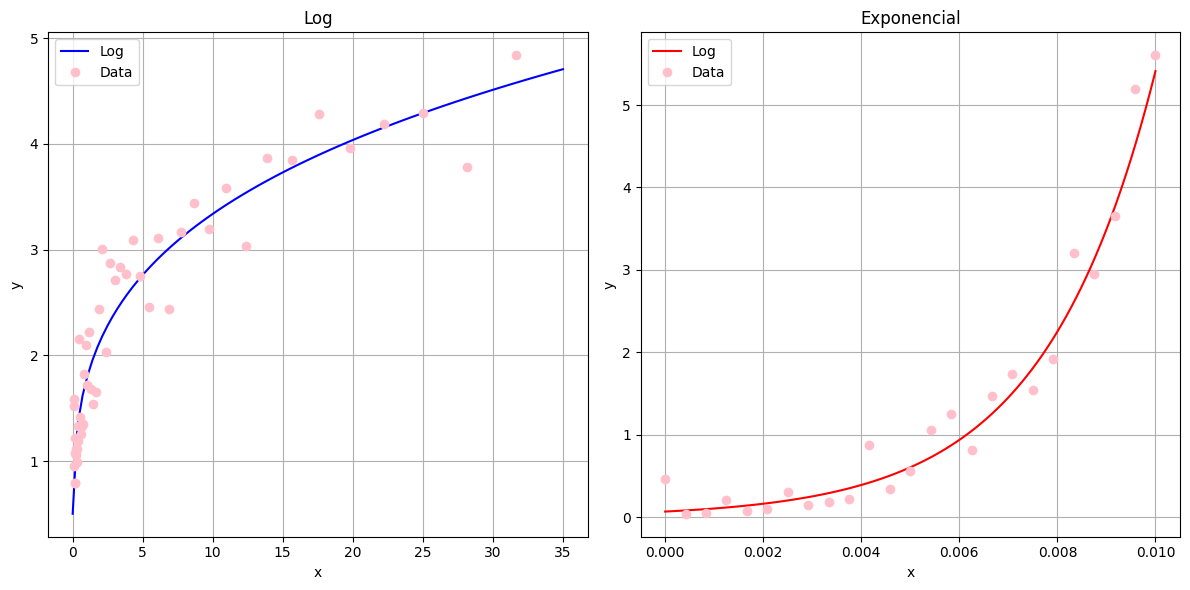

3. El error de aproximación dado el código para el conjunto 4b es : ~ 2.77
La funcion propuesta para el conjunto de datos 4.ii es: e^-2.7 * (e^438.43)^x


In [53]:
x, y = np.load("ejercicio_4_a.npy")
log_y = np.log(y)
a, error = Calcular_parametros_error((np.ones_like(x),np.log(x)),log_y)
# log(a) + b log(x)

xs = np.linspace(0.01, 35, 100)
y1 = np.exp(a[0]) * ((xs)**a[1])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, y1, label='Log', color='blue')
plot('Log',x,y)

print('3. El error de aproximación dado el código para el conjunto 4a es: ~', np.round(error,2))
print('La funcion propuesta para el conjunto de datos 4.i es: f(x)=', 'e^' ,np.round(a[0], 2), '*' , '(log(xs)^', np.round(a[1], 2),')')

x, y = np.load("ejercicio_4_b.npy")
x = np.array(x/100)
y = np.array(y/100)
log_y = np.log(y)

a1, error1 = Calcular_parametros_error((np.ones_like(x),x),log_y)
xs = np.linspace(0, 0.01, 100)
y1 = np.exp(a1[0]) * (np.exp(a1[1])**xs)

plt.subplot(1, 2, 2)
plt.plot(xs, y1, label='Log', color='red')
plot('Exponencial',x,y)
plt.show()

print('3. El error de aproximación dado el código para el conjunto 4b es : ~', round(np.round(error1,2), 2))
print('La funcion propuesta para el conjunto de datos 4.ii es:', 'e^' + str(np.round(a1[0], 2)), '*' ,'(e^' + str(np.round(a1[1], 2 ))+ ')^x')

3. El error de aproximación para el conjunto $4a$ es $\approx $ $1.29$.
4. Los parametros que obtuvimos fueron: 
$$a_{1}=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\

\end{bmatrix}
\approx
\begin{bmatrix}
    0.57\\
    0.27\\

\end{bmatrix}
$$

La función propuesta para minimizar el error el conjunto de datos 4.i es $ \approx $:

$f(x)$ = $e^{0.57}$ $*$ $log(x)^{0.27}$ 

3. El error de aproximación para el conjunto $4b$ es $ \approx $ $2.77$. 
4. Los parametros que obtuvimos fueron: 
$$a_{2}=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\

\end{bmatrix}
\approx
\begin{bmatrix}
    -2.7\\
    438.43\\

\end{bmatrix}

$$
La función propuesta para minimizar el error el conjunto de datos 4.i es:

$f(x) = e^{-2.7} * (e^{438.43})^x$






## Ejercicio 5. Cuadrados Mínimos Ponderados

En situaciones en las cuales los pares ordenados en el conjunto de datos no tienen la misma variabilidad o no pueden considerarse igualmente precisos, es deseable realizar un ajuste que considere estas diferencias.
Por ejemplo, el uso de diferentes instrumentos de medición o diferentes condiciones de medición derivan en mediciones con distintas magnitudes para el error. Queremos realizar un ajuste por cuadrados mínimos que considere la preferencia por datos más precisos. Para ello consideramos el método de cuadrados mínimos ponderados.

a)Comentar brevemente el objetivo del método de cuadrados mínimos ponderados. Luego, deducir la solución de cuadrados mínimos ponderados.

b) Repetir los pasos del ejercicio 2, utilizando cuadrados mínimos ponderados con los datos de los archivos ejercicio_5_i.npy y ejercicio_5_ii.npy. Comparar con la solución de cuadrados mínimos convencional (sin considerar los pesos).

c)¿Qué diferencias encuentra encuentra entre ambos conjuntos de datos? ¿Qué sucede con el ajuste de la función cuadrática al usar distintos pesos para los datos?¿y con el ajuste de una función cúbica?

d)Graficar en una misma figura el conjunto de datos y las curvas cuadráticas ajustadas. Mostrar en una figura lateral los pesos correspondientes a cada caso

La información presentada en las matrices no ponderadas es igual con la proporcionada en el ejercicio 2.

1. Matriz de Diseño.

La matriz de diseño se representa como $WX_{1}$ $\in$ ${\mathbb{R}^{m\times 3}}$ y $WX_{2}$ $\in$ ${\mathbb{R}^{m\times 4}}$, $WX_{3}$ $\in$ ${\mathbb{R}^{m\times 3}}$ y $WX_{4}$ $\in$ ${\mathbb{R}^{m\times 4}}$:

$$WX_{1}, WX_{3}=
\begin{bmatrix}
w_1& \ldots & 0 \\
\vdots & \ddots & \vdots \\
 0 & \ldots & w_{mm}
\end{bmatrix}
\begin{bmatrix}
    1 & x_{1} & x_{1}^2\\
    \vdots & \vdots & \vdots\\
    1 & x_{m} & x_{m}^2\\
\end{bmatrix}
, 
\quad
WX_{2}, WX_{4}=
\begin{bmatrix}
w_1& \ldots & 0 \\
\vdots & \ddots & \vdots \\
 0 & \ldots & w_{mm}
\end{bmatrix}
\begin{bmatrix}
    1 & x_{1} & x_{1}^2 & x_{1}^3\\
    \vdots & \vdots & \vdots & \vdots\\
    1 & x_{m} & x_{m}^2 & x_{m}^3\\
\end{bmatrix}

$$

x son los datos de la muestra y m es el tamaño de la muestra

2. Vector de Parámetros.

El vector de parámetros se representa como $a_{1}$ $\in$: ${\mathbb{R}^3}$ y $a_{2}$ $\in$: ${\mathbb{R}^4}$ :
$$aw_{1}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
    a_{2}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
\end{bmatrix}

\quad

aw_{2}=
\begin{bmatrix}
    a_{0}\\
    a_{1}\\
    a_{2}\\
    a_{3}\\
\end{bmatrix}
=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_{3}\\
\end{bmatrix}

$$
Los $\beta_{i}$ y $a_{i}$ para cada $\vec{aw}$ son distintos, comparten simbolo para simplificar la notacion

3. Vector de Datos a Ajustar.

El vector de datos a ajustar se representa como:
${\mathbb{R}^m}$ :
$$
y=
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{m}\\
\end{bmatrix}
$$
$y$ son los datos de la muestra y $m$ es el tamaño de la muestra

4. Ecuaciones Normales.

Las ecuaciones normales para el ajuste lineal son:
$$
X_{i}^T W X_{i} a_{i} = X_{i}^T W y 
\quad \quad i \in \text{{\{1,2\}}}
$$


In [54]:
import numpy as np
def Calcular_parametros_error_ponderados(design, y, IW):
    IWdiagonal = np.diag(IW)
    matrix_design = np.column_stack(design)
    matrix_designT = np.transpose(matrix_design)
    inverse = np.matmul(np.linalg.inv(np.matmul(np.matmul(matrix_designT,IWdiagonal),matrix_design)),np.matmul(matrix_designT,IWdiagonal))
    a = np.matmul(inverse,y)
    # Calcular el error de aproximación
    y_predicha = np.matmul(matrix_design,a)
    aproximation_error = np.sqrt(np.matmul(np.transpose(y - y_predicha),(y - y_predicha)))
    return (a,aproximation_error)

Paremtros sin ponderar = [-0.48 -0.19  0.09] [-26.43  28.96 -10.17   1.14]
3. El error de aproximación dado el código para el conjunto 5_i.:
 ~ 4.4199 en la cuadratica y ~ 0.6797 en la cubica sin ponderar
 ~ 4.6407 en la cuadratica y ~ 0.6814 en la cubica ponderadas
Paremtros ponderados = [ 1.64 -1.78  0.35] [-26.7   29.26 -10.27   1.15]
Paremtros sin ponderar = [-0.48 -0.19  0.09] [-26.43  28.96 -10.17   1.14]


C:\Users\chant\AppData\Local\Temp\ipykernel_66328\3635957091.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


3. El error de aproximación dado el código para el conjunto 5_ii:
 ~ 4.4199 en la cuadratica y ~ 0.6797 en la cubica sin ponderar
 ~ 4.6403 en la cuadratica y ~ 0.6809 en la cubica ponderadas
Paremtros ponderados = [-2.54  1.38 -0.18] [-26.22  28.72 -10.08   1.13]


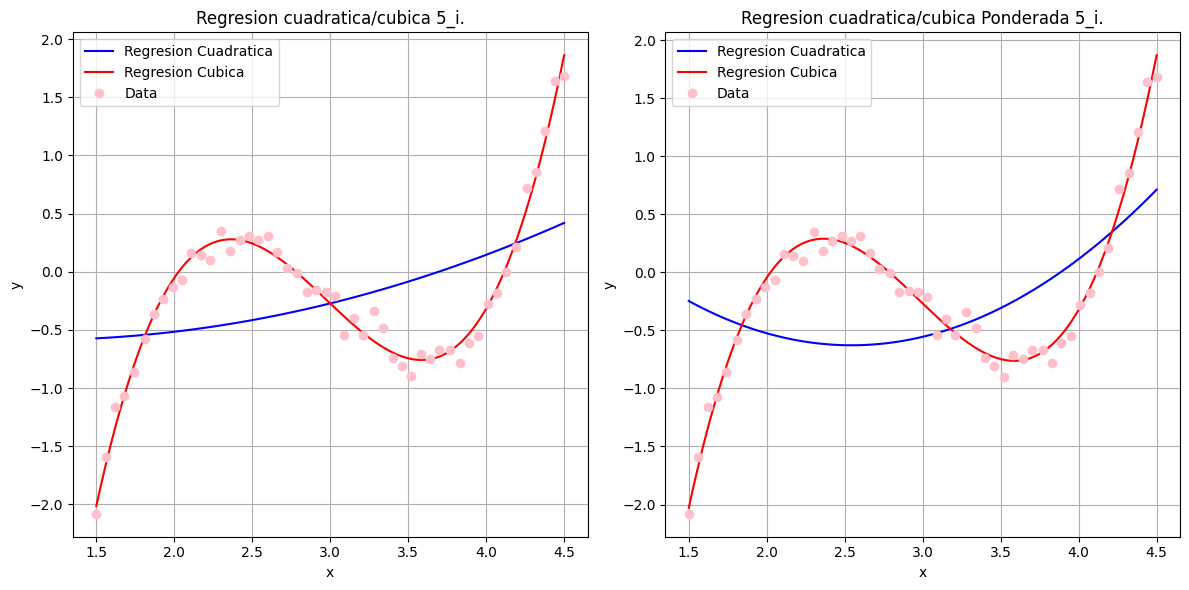

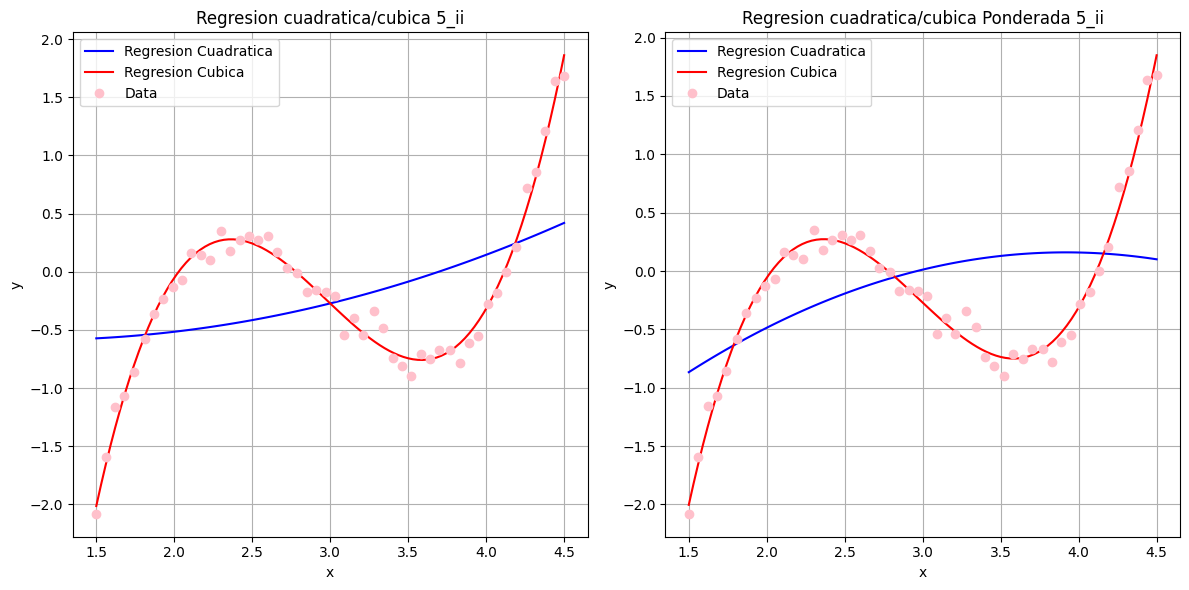

In [57]:
error_dic = {}
for name in ["ejercicio_5_i.npy","ejercicio_5_ii.npy"]:
    x, y, IW = np.load(name)
    a2,error2 = Calcular_parametros_error((np.ones_like(x),x,x**2),y)
    a3,error3 = Calcular_parametros_error((np.ones_like(x),x,x**2,x**3),y)

    xs = np.linspace(1.5, 4.5, 100)
    ys = a2[0] + a2[1]*xs + a2[2]*xs**2
    yss = a3[0] + a3[1]*xs + a3[2]*xs**2 + a3[3]*xs**3

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
    plt.plot(xs, yss, label='Regresion Cubica', color='red')
    plot('Regresion cuadratica/cubica ' + name[10:14],x,y)

    print('Paremtros sin ponderar =',np.round(a2,2),np.round(a3,2))

    a2, error2pon= Calcular_parametros_error_ponderados((np.ones_like(x),x,x**2),y,IW)
    a3, error3pon = Calcular_parametros_error_ponderados((np.ones_like(x),x,x**2,x**3),y,IW)
    error_dic[name] = (error2,error3,error2pon,error3pon)

    xs = np.linspace(1.5, 4.5, 100)
    ys = a2[0] + a2[1]*xs + a2[2]*xs**2
    yss = a3[0] + a3[1]*xs + a3[2]*xs**2 + a3[3]*xs**3

    plt.subplot(1, 2, 2)
    plt.plot(xs, ys, label='Regresion Cuadratica', color='blue')
    plt.plot(xs, yss, label='Regresion Cubica', color='red')
    plot('Regresion cuadratica/cubica Ponderada ' + name[10:14],x,y)

    print('3. El error de aproximación dado el código para el conjunto '+ name[10:14]+':\n ~', np.round(error_dic[name][0],4),
          'en la cuadratica y ~', np.round(error_dic[name][1],4), 'en la cubica sin ponderar\n ~', np.round(error_dic[name][2],4),
          'en la cuadratica y ~', np.round(error_dic[name][3],4), 'en la cubica ponderadas')
    
    print('Paremtros ponderados =',np.round(a2,2),np.round(a3,2))


3. El error de aproximación para el conjunto $5i$ es $ \approx $ $4.42$ para la funcion cuadratica y $ \approx $ $0.0.679$ para la funcion cubica sin ponderar. $\newline$ Luego, el error para la cuadratica ponderada fue $ \approx$  $4.64$ y el de la cubica ponderada fue $ \approx$ $0.68$. 
4. Los parametros que obtuvimos para la funcion cuadratica y cubica dado el conjunto $5i$ sin ponderar fueron respectivamente: 
$$a_1=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\

\end{bmatrix}
\approx
\begin{bmatrix}
    -0.48\\
    -0.19\\
    0.09\\
\end{bmatrix}$$
<br>

$$a_2=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_3\\
\end{bmatrix}\approx

\begin{bmatrix}
    -26.43\\
    28.96\\
    -10.17\\
    1.14\\
\end{bmatrix}
$$
Por lo tanto, la ecuación de la parabola que mejor se ajusta al conjunto de datos es $y$ $=$ $-0.48^0$ $+$ $1.91^1$ $+$ $ 0.09^2 \newline$ 
Y la ecuación de la recta que mejor se ajusta al conjunto de datos es $y$ $=$ $26.43^0$ $+$ $28.96^1$ $-$ $ 10.17^2$ $+$ $ 1.14^3\newline$
Luego, los parametros para las funciones cuadratica y cubica ponderadas fueron respectivamente:
$$aw_1=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\

\end{bmatrix}
\approx
\begin{bmatrix}
    1.64\\
    -1.78\\
    0.35\\
\end{bmatrix}$$
<br>

$$aw_2=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_3\\
\end{bmatrix}\approx

\begin{bmatrix}
    -26.7\\
    29.26\\
    -10.27\\
    1.15\\
\end{bmatrix}
$$
Por lo tanto, la ecuación de la parabola que mejor se ajusta al conjunto de datos es $y$ $=$ $1.64^0$  $-1.78^1$ $+$ $ 0.35^2 \newline$ 
Y la ecuación de la recta que mejor se ajusta al conjunto de datos es $y$ $=$ $-26.7^0$ $+$ $29.26^1$ $ -10.27$ $+$ $ 1.15^3\newline$
<br>

3. El error de aproximación para el conjunto $5ii$ es es $4.42$ para la funcion cuadratica y $0.0.679$ para la funcion cubica sin ponderar. 
$\newline$ Luego, el error para la cuadratica ponderada fue  $4.6403$ y el de la cubica ponderada fue  $0.6809$. 
4. Los parametros que obtuvimos para la funcion cuadratica y cubica dado el conjunto $5ii$ sin ponderar fueron respectivamente: 

$$a_1=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\

\end{bmatrix}
\approx
\begin{bmatrix}
    -0.48\\
    -0.19\\
    0.09\\
\end{bmatrix}$$
<br>

$$a_2=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_3\\
\end{bmatrix}\approx

\begin{bmatrix}
    -26.43\\
    28.96\\
    -10.17\\
    1.14\\
\end{bmatrix}
$$
Por lo tanto, la ecuación de la parabola que mejor se ajusta al conjunto de datos es $y$ $=$ $-0.48^0$ $+$ $1.91^1$ $+$ $ 0.09^2 \newline$ 
Y la ecuación de la recta que mejor se ajusta al conjunto de datos es $y$ $=$  $26.43^0$ $+$ $28.96^1$ $+$ $ 10.17^2$ $+$ $ 1.14^3\newline$
Luego, los parametros para las funciones ponderadas para la funcion cuadratica y cubica fueron respectivamente: 
$$aw_3=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\

\end{bmatrix}
\approx
\begin{bmatrix}
    -2.54\\
    1.38\\
   -0.18\\
\end{bmatrix}$$
<br>

$$aw_4=
\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}\\
    \beta_3\\
\end{bmatrix}\approx

\begin{bmatrix}
    -26.22\\
    28.72\\
    -10.08\\
    1.13\\
\end{bmatrix}
$$
Por lo tanto, la ecuación de la parabola que mejor se ajusta al conjunto de datos es $y$ $=$ $-2.54^0$ $+$ $1.38^1$ $ -0.18^2 \newline$ 
Y la ecuación de la recta que mejor se ajusta al conjunto de datos es $y$ $=$ $-26.22^0$ $+$ $28.72^1$ $ -10.08$ $+$ $ 1.13^3\newline$